외부 요소와 코로나 전파 간 상관 분석

이번 코로나 사태가 장기화 됨에 따라 다양한 시점에서 이번 사태를 분석하고 있다.
이번 연구는 그러한 다양한 시점 중 하나인 코로나 외부 요소와 코로나 전파 간의 상관 관계를 분석하여, 현 사태에 대한 이해를 돕고, 코로나 대응에 기여할 수 있는 자료를 만드는 것을 목표로 한다.

그러한 관점에서 개입이 불가능한 외부 요소로써 날씨 변화에 따른 코로나 전파 관계에 대한 추적과, 정부의 코로나에 대해서 개입하므로 만들어지는 외부 요소인 정부의 코로나 정책이 코로나 전파에 어떠한 영향을 미치게 되었는지 확인하고, 더 나아가 나타난 현상에 대한 근거를 제시하려고 한다.

먼저 개입이 불가능한 외부 요소로써 날씨를 선정한 이유에 대해서 짧게 언급하자면, 코로나는 사람 간 감염이 주된 전파 사유이며, 이것은 유동인구와 실내 밀집 정도, 혹은 건습 여하에 따라서 사람들의 행동 양식에 영향을 미치며, 코로나 병원이 전파되기 쉬운 환경을 조성하는 사유로도 볼수 있기 때문에 선정하였습니다.
이에 날씨와 확진자 간 상관 관계를 분석하여 각 요소가 끼치는 영향에 대하여 조사한다.
각 자료는 공공데이터와 기상청의 자료를 가공하여 준비했다.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cfm_day = pd.read_csv("./cfm_wx/Time_extend.csv",index_col=0)#일일 확진자 누계
cfm_pr = pd.read_csv("./cfm_wx/TimeProvince_ext.csv",index_col=0)#시도별 일일 확진자 누계
cfm_ages = pd.read_csv("./cfm_wx/TimeAge_ext.csv",index_col=0)#나이별 일일 확진자 누계
cfm_gen = pd.read_csv("./cfm_wx/TimeGender_ext.csv",index_col=0)#성별 일일 확진자 누계

wx = pd.read_csv("./cfm_wx/wx_summary.csv",index_col=0)#일일 기상 관측(지상)
wx.fillna(0)#기상 데이터에서 결측치 제거

display(cfm_day.head(2))
display(cfm_pr.head(2))
display(cfm_ages.head(2))
display(cfm_gen.head(2))
# display(wx.columns)

,date,test,negative,confirmed,released,deceased
0,2020-01-20,1,0,1,0,0
1,2020-01-21,1,0,1,0,0


,province,confirmed,released,deceased
date,,,,
2020-01-20,Seoul,0,0,0
2020-01-21,Seoul,0,0,0


,date,age,confirmed,deceased
0,2020-03-02,0s,32,0
1,2020-03-02,10s,169,0


,date,sex,confirmed,deceased
0,2020-03-02,female,2621,9
1,2020-03-02,male,1591,13


In [98]:
pr_names = cfm_pr['province'].unique()
age_groups = cfm_ages['age'].unique()
gens = cfm_gen['sex'].unique()

prs_cfm={}
ages_cfm={}
gens_cfm={}
prs_wx={}

for i in pr_names:#지역별 확진자 테이블 분류
    t = cfm_pr[cfm_pr['province'] == i]
    t.reset_index(drop=False,inplace=True)
    t['diff_cfm'] = t['confirmed'].diff()
    prs_cfm[i] = t

    t = wx[wx['province'] == i]
    t.reset_index(drop=False,inplace=True)
    t['diff_temp'] = t['max_temp'] - t['min_temp']
    prs_wx=t

for i in age_groups:#나이별 확진자 테이블 분류
    t = cfm_ages[cfm_ages['age'] == i]
    t.reset_index(drop=True,inplace=True)
    cfm_diff = t['confirmed'].diff()
    cfm_diff.name = 'diff_cfm'
    ages_cfm[i]=t.merge(cfm_diff,left_index=True,right_index=True)

for i in gens:#성별 확진자 테이블 분류
    t = cfm_gen[cfm_gen['sex'] == i]
    t.reset_index(drop=True,inplace=True)
    cfm_diff = t['confirmed'].diff()
    cfm_diff.name = 'diff_cfm'
    gens_cfm[i]=t.merge(cfm_diff,left_index=True,right_index=True)


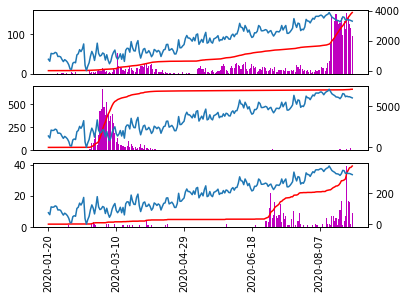

In [115]:

fig = plt.figure()

subplts = [fig.add_subplot(3,1,i+1) for i in range(3)]
sample_prs = ['Seoul','Daegu','Gwangju']

for idx, i in enumerate(sample_prs):
    if idx != 2 :
        subplts[idx].get_xaxis().set_visible(False)
    ax2 = subplts[idx].twinx()
    ax3 = subplts[idx].twinx()
    ax3.get_yaxis().set_visible(False)
    subplts[idx].bar(prs_cfm[i].index,prs_cfm[i]['diff_cfm'],color='m')
    ax3.plot(prs_wx['avg_temp'])
    ax2.plot(prs_cfm[i]['confirmed'], color = 'r')

    dates = prs_cfm[i]['date']
    ndtrng = range(0,len(prs_cfm[i]['date']),50)
    subplts[idx].set_xticks(ndtrng)
    subplts[idx].set_xticklabels(prs_cfm[i]['date'][::50],rotation='vertical')
fig.show()

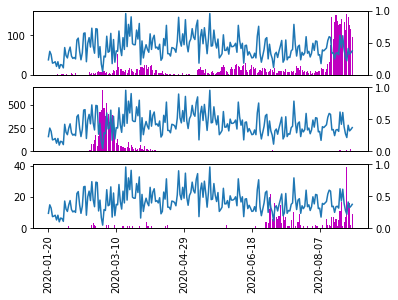

In [116]:
fig = plt.figure()

subplts = [fig.add_subplot(3,1,i+1) for i in range(3)]
sample_prs = ['Seoul','Daegu','Gwangju']

for idx, i in enumerate(sample_prs):
    if idx != 2 :
        subplts[idx].get_xaxis().set_visible(False)
    ax2 = subplts[idx].twinx()
    ax3 = subplts[idx].twinx()
    ax3.get_yaxis().set_visible(False)
    subplts[idx].bar(prs_cfm[i].index,prs_cfm[i]['diff_cfm'],color='m')
    ax3.plot(prs_wx['diff_temp'])

    dates = prs_cfm[i]['date']
    ndtrng = range(0,len(prs_cfm[i]['date']),50)
    subplts[idx].set_xticks(ndtrng)
    subplts[idx].set_xticklabels(prs_cfm[i]['date'][::50],rotation='vertical')
fig.show()

In [ ]:

for i in pr_names[:9] :

